In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
df.shape

(43152, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,43152.0,21576.500000,12457.053745,1.0,10788.75,21576.50,32364.25,43152.00
carat,43152.0,0.797855,0.473594,0.2,0.40,0.70,1.04,5.01
depth,43152.0,61.747177,1.435454,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.458347,2.233904,43.0,56.00,57.00,59.00,95.00
price,43152.0,3929.491912,3985.527795,326.0,947.75,2401.00,5312.00,18823.00
x,43152.0,5.731568,1.121279,0.0,4.71,5.70,6.54,10.74
y,43152.0,5.735018,1.148809,0.0,4.72,5.71,6.54,58.90
z,43152.0,3.538568,0.708238,0.0,2.91,3.53,4.04,31.80


In [4]:
df.value_counts().transpose()

Id     carat  cut        color  clarity  depth  table  price  x     y     z   
1      1.06   Ideal      I      SI2      61.8   57.0   4270   6.57  6.60  4.07    1
28772  0.91   Very Good  G      VS1      63.4   54.0   4209   6.24  6.07  3.90    1
28764  0.25   Good       D      VS1      57.6   60.0   399    4.15  4.18  2.40    1
28765  0.40   Very Good  H      VVS2     59.7   57.0   882    4.83  4.85  2.89    1
28766  0.80   Ideal      F      SI2      59.9   59.0   2762   6.01  6.07  3.62    1
                                                                                 ..
14386  0.52   Ideal      D      VS2      61.7   56.0   1822   5.16  5.18  3.19    1
14387  0.39   Good       F      SI1      63.6   58.0   718    4.60  4.65  2.94    1
14388  0.90   Good       I      VVS1     62.4   61.0   3972   6.05  6.09  3.79    1
14389  1.03   Very Good  D      SI2      61.8   60.0   4478   6.42  6.45  3.98    1
43152  0.33   Ideal      G      VS2      61.2   55.0   743    4.49  4.46  2.74   

In [5]:
# Create new columns based on existing data
df['volume'] = df['x'] * df['y'] * df['z']

# Example of creating a new column based on conditions
df['price_category'] = pd.cut(df['price'], bins=[0, 5000, 10000, float('inf')], labels=['Low', 'Medium', 'High'])


In [11]:
df.head(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_category
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,Low
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,High
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,Low
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,Low
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,Low


In [4]:
categorical_data = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64' , 'int64']).columns

In [6]:
# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame containing only numerical data
df_numerical = df[numerical_columns]

# Display the first few rows of the new DataFrame
print(df_numerical.head())

   Id  carat  depth  table  price     x     y     z      volume
0   1   1.06   61.8   57.0   4270  6.57  6.60  4.07  176.483340
1   2   1.51   60.9   58.0  15164  7.38  7.42  4.51  246.965796
2   3   0.32   61.3   56.0    828  4.43  4.41  2.71   52.943373
3   4   0.53   61.2   56.0   1577  5.19  5.22  3.19   86.422842
4   5   0.70   61.0   57.0   2596  5.76  5.72  3.50  115.315200


<Axes: >

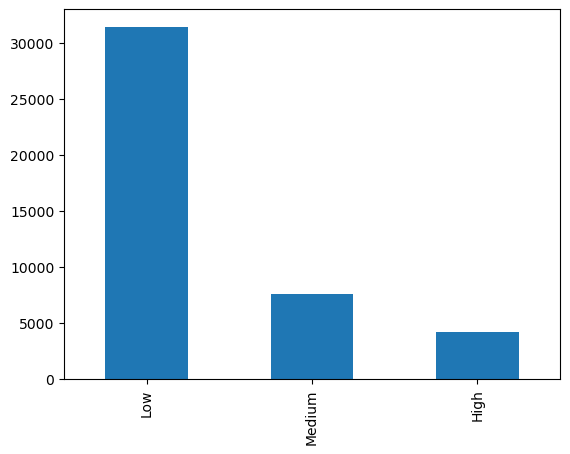

In [14]:
df['price_category'].value_counts().plot(kind = 'bar')

In [15]:
corr_matrix = df.corr()
corr_matrix

,Id,carat,depth,table,price,x,y,z,volume
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981,0.002562
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923,0.971061
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834,0.004642
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746,0.167715
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665,0.897903
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677,0.951559
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670,0.974787
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000,0.944252
volume,0.002562,0.971061,0.004642,0.167715,0.897903,0.951559,0.974787,0.944252,1.000000


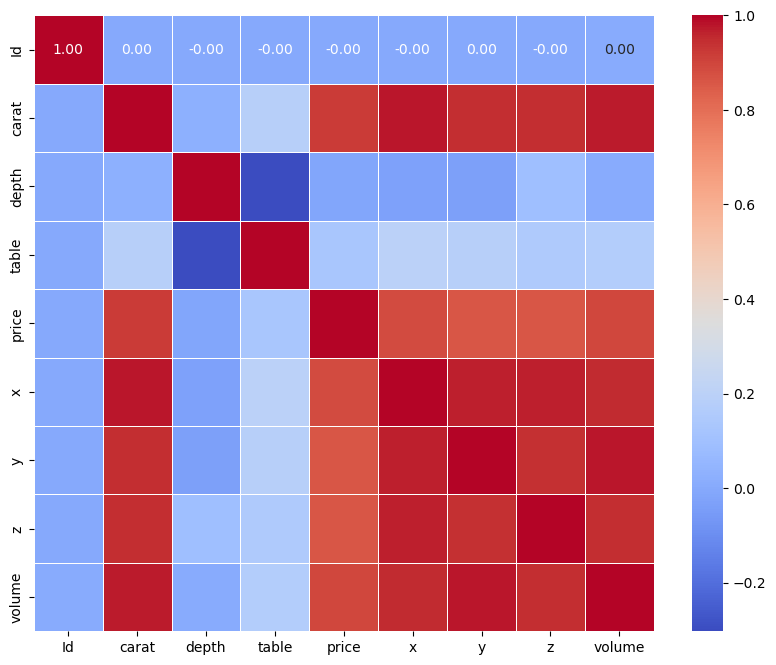

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [17]:
pd.crosstab(df["price_category"], df["color"])

color,D,E,F,G,H,I,J
price_category,,,,,,,
Low,4394,6440,5812,6390,4401,2636,1337
Medium,697,916,1183,1804,1430,928,604
High,330,476,638,866,820,701,349


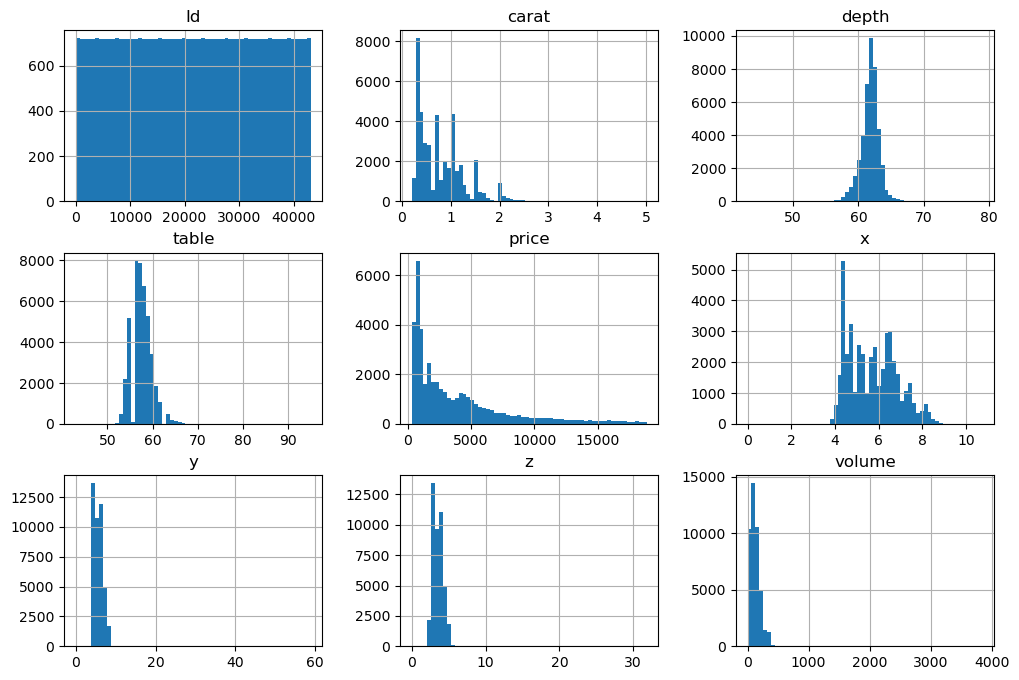

In [18]:
df.hist(bins=60, figsize=(12, 8))
plt.show()

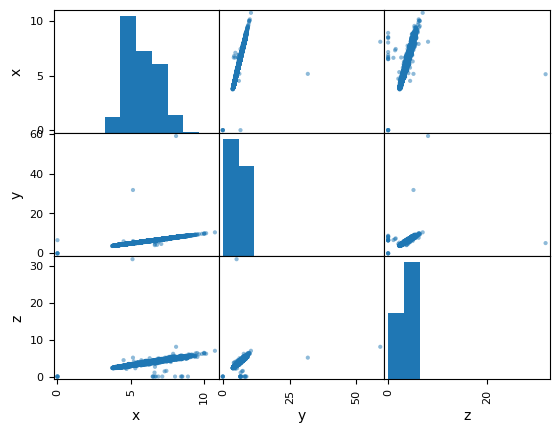

In [19]:
pd.plotting.scatter_matrix(df[["x", "y", "z"]])
plt.show()

<Figure size 1200x1200 with 0 Axes>

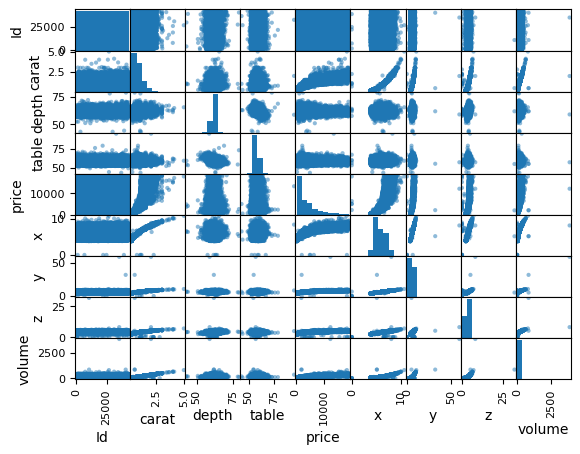

In [20]:
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(df)
plt.show()

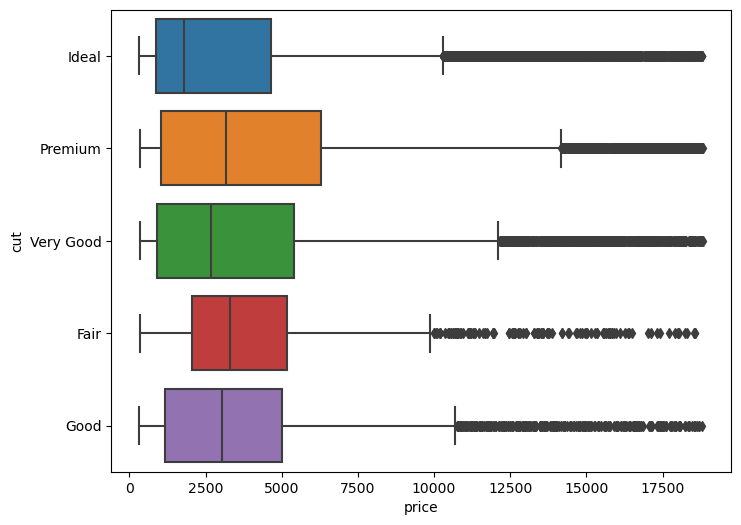

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='cut', data=df)
plt.show()

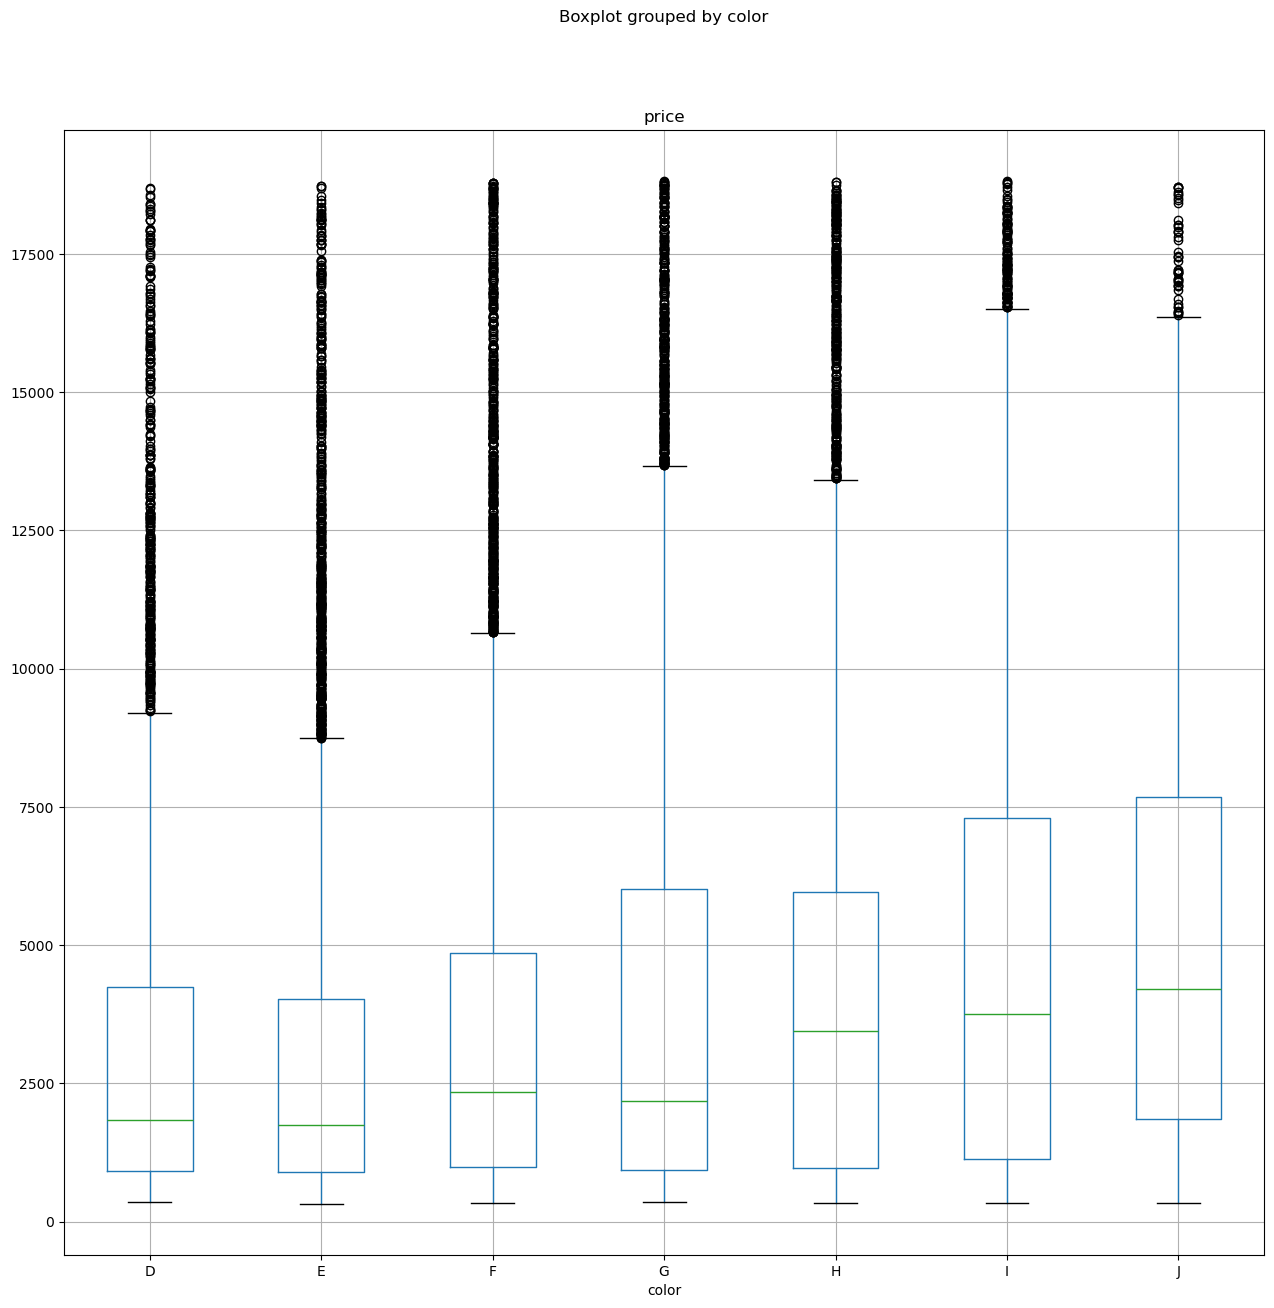

In [22]:
# Convert 'color' column to categorical dtype if it's not already
df['color'] = pd.Categorical(df['color'])

# Create the boxplot
df.boxplot(column='price', by='color', figsize=(15, 15))

# Show the plot
plt.show()

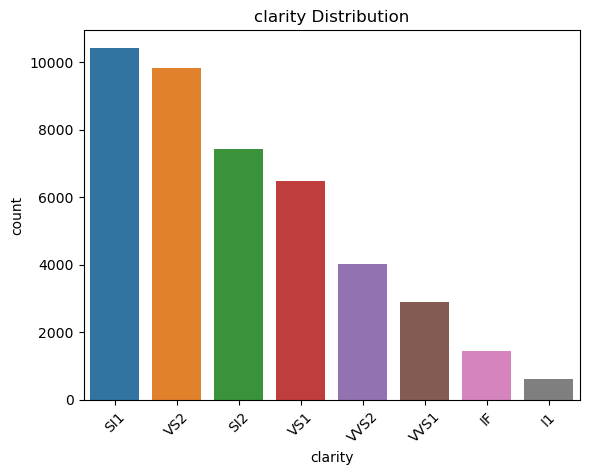

In [23]:
sns.countplot(data=df, x='clarity', order=df['clarity'].value_counts().index)
plt.title('clarity Distribution')
plt.xticks(rotation=45)
plt.show()

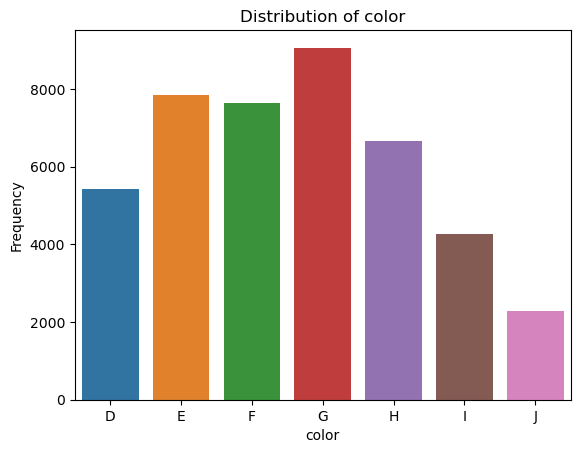

In [24]:
sns.countplot(data=df, x='color')
plt.title('Distribution of color')
plt.xlabel('color')
plt.ylabel('Frequency')
plt.show()

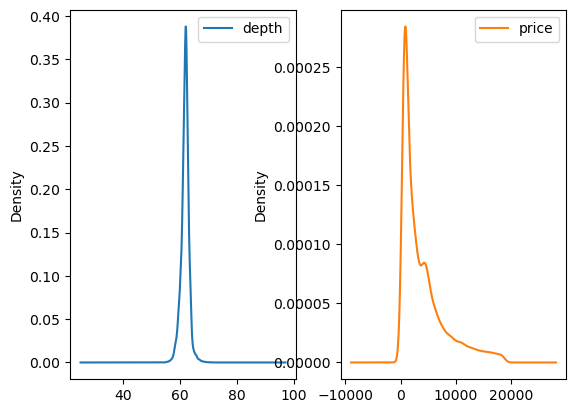

In [25]:
z=['depth','price']
df[z].plot(kind='density',subplots=True,layout=(1,2),sharex=False)
plt.show()

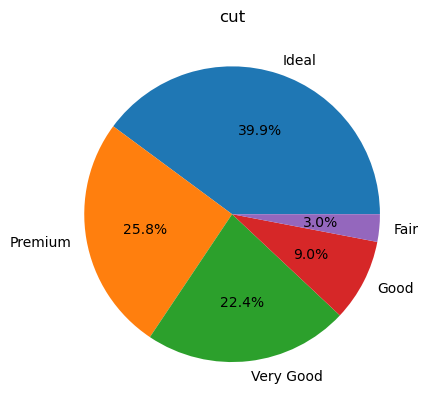

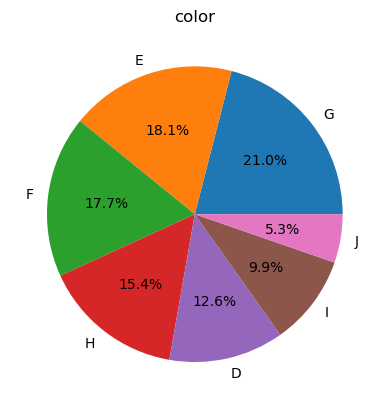

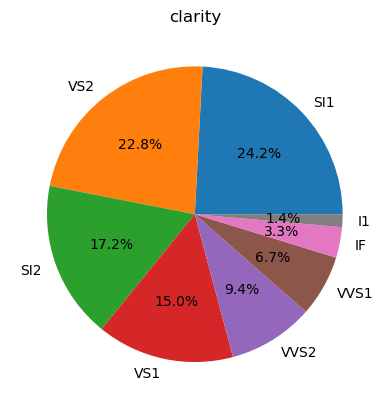

In [26]:
for column in categorical_data:
    perceage = (df[column].value_counts() * 100) / len(df)
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(column)  
    plt.show()

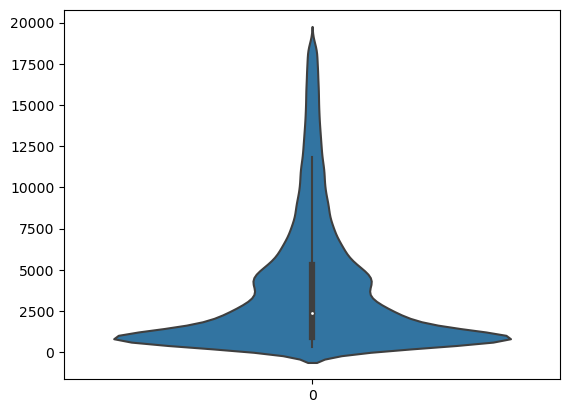

In [27]:
sns.violinplot(data=df[ 'price'])
plt.show()

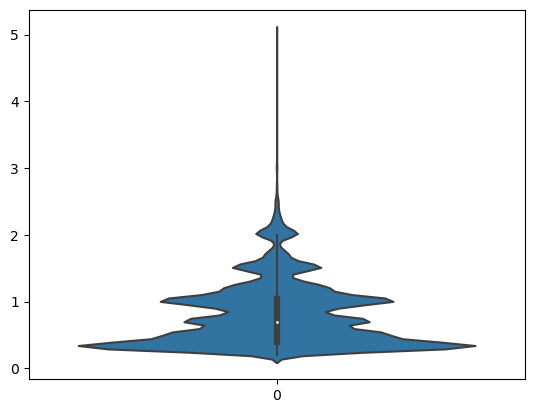

In [28]:
sns.violinplot(data=df[ 'carat'])
plt.show()

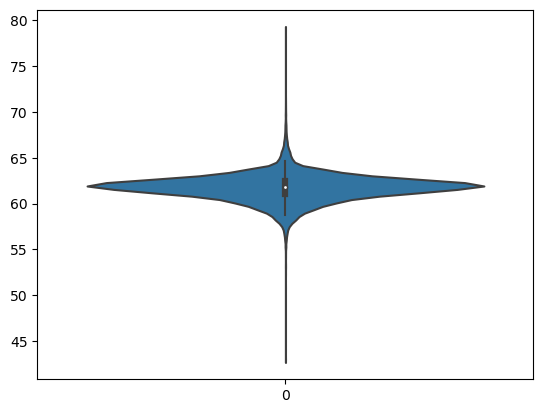

In [29]:
sns.violinplot(data=df[ 'depth'])
plt.show()

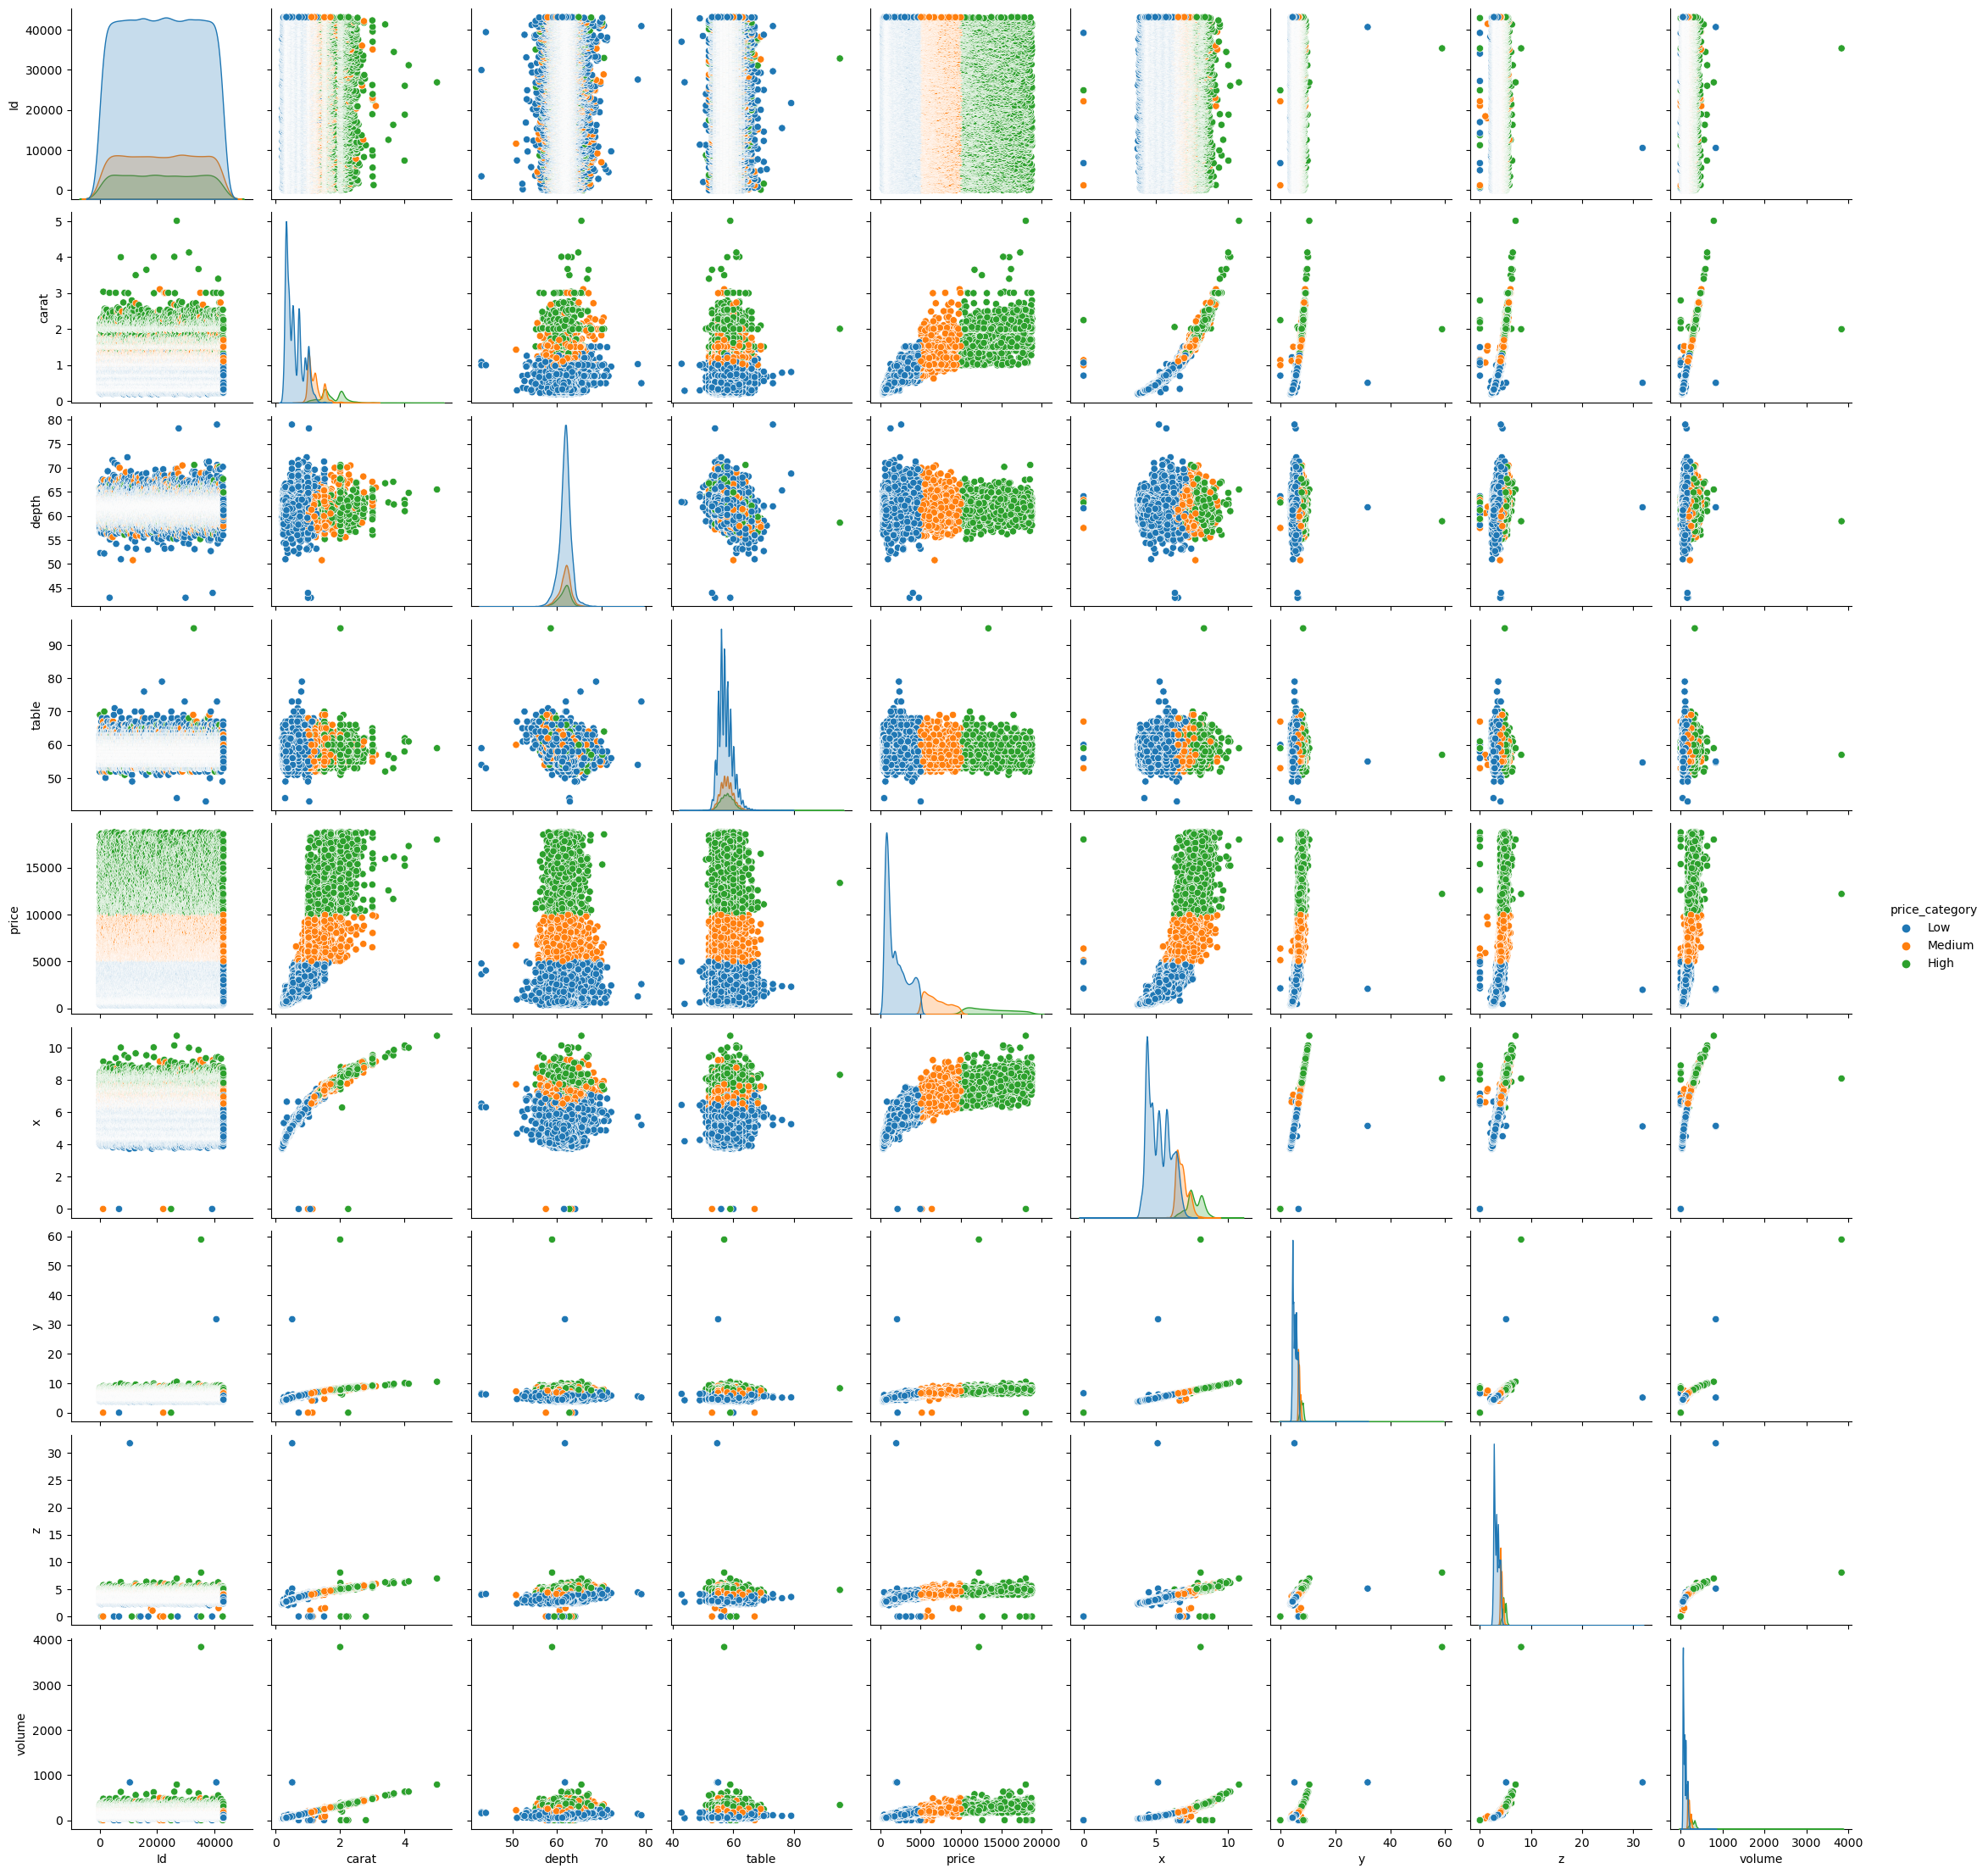

In [30]:
p=sns.pairplot(df, hue = 'price_category')

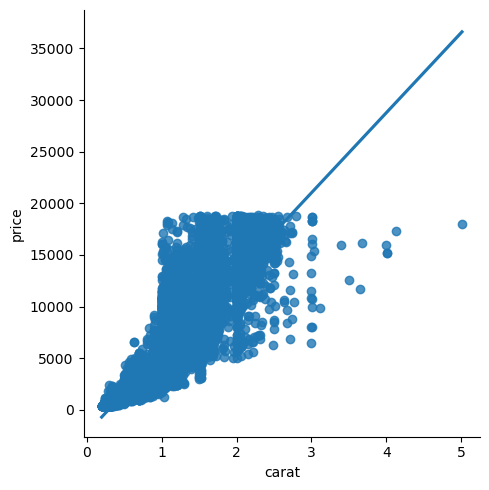

In [31]:
sns.lmplot(x="carat", y="price", data=df)

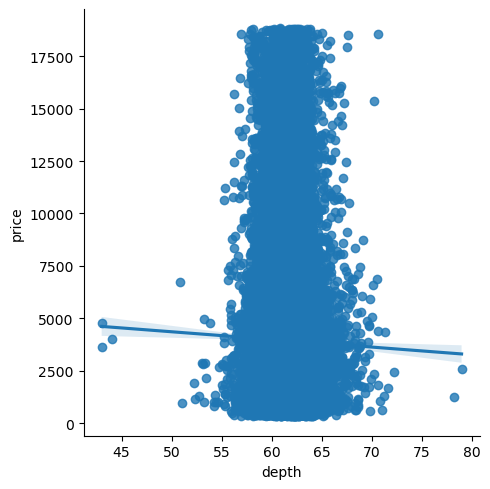

In [32]:
sns.lmplot(x="depth", y="price", data=df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


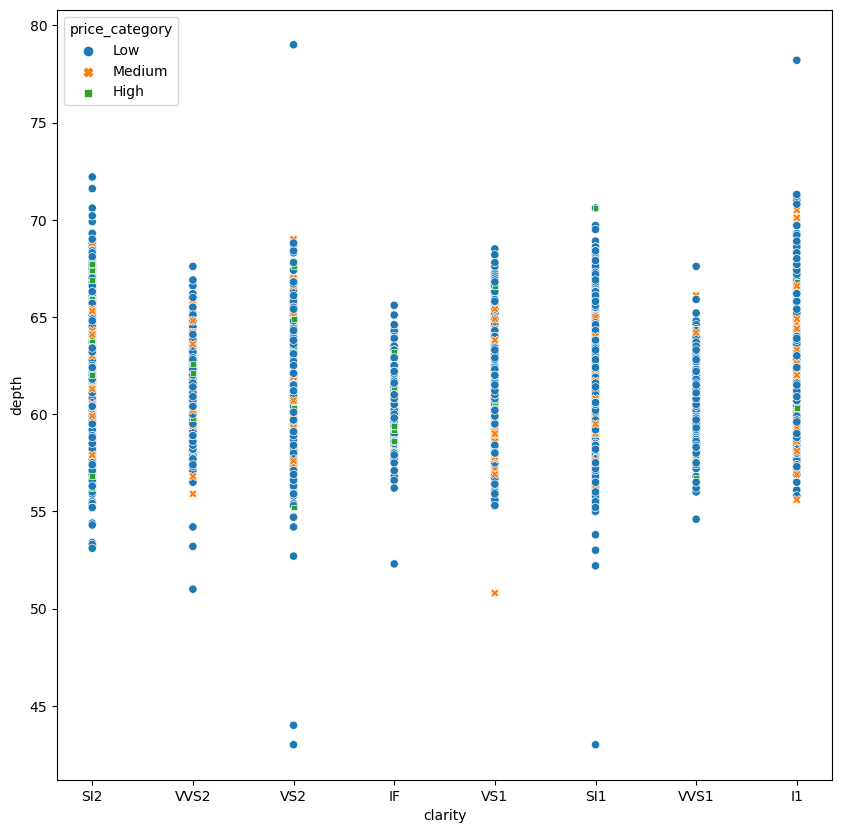

In [33]:
plt.figure(figsize=(10, 10))

sns.scatterplot('clarity', 'depth',data=df,hue="price_category", style="price_category")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


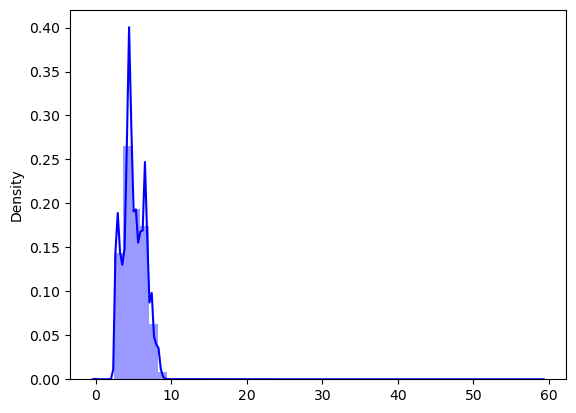

In [34]:
sns.distplot(df[['x','y','z']], color='b')
plt.show()

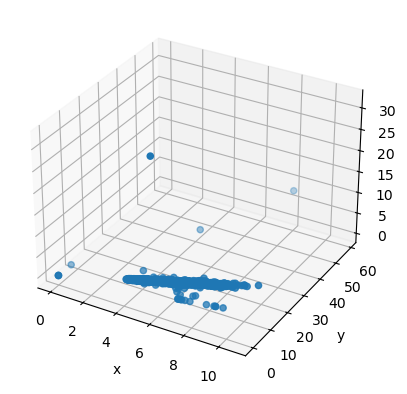

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

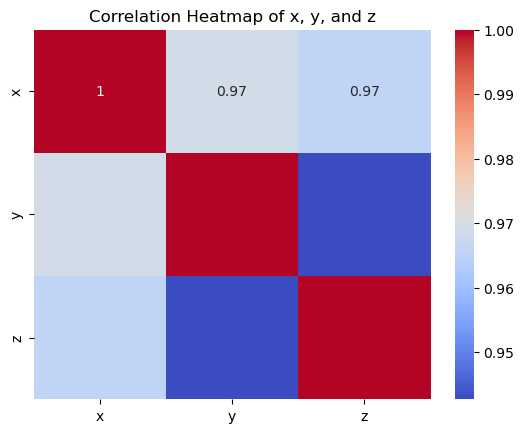

In [36]:
# Calculate the correlation matrix
corr_matrix = df[['x', 'y', 'z']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of x, y, and z')
plt.show()


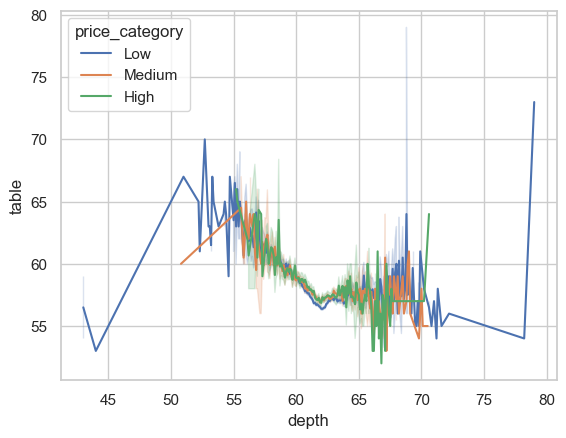

In [37]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="depth", y="table",hue="price_category",data=df)
plt.show()

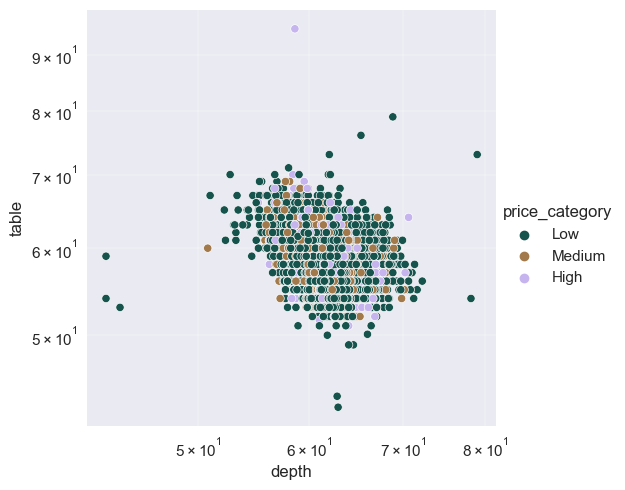

In [38]:

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Create a relplot
g = sns.relplot(data=df, x="depth", y="table", hue="price_category", palette="cubehelix", sizes=(10, 200))

# Set xscale and yscale to log
g.set(xscale="log", yscale="log")

# Add minor gridlines
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

# Remove spines
g.despine(left=True, bottom=True)

# Show the plot
plt.show()

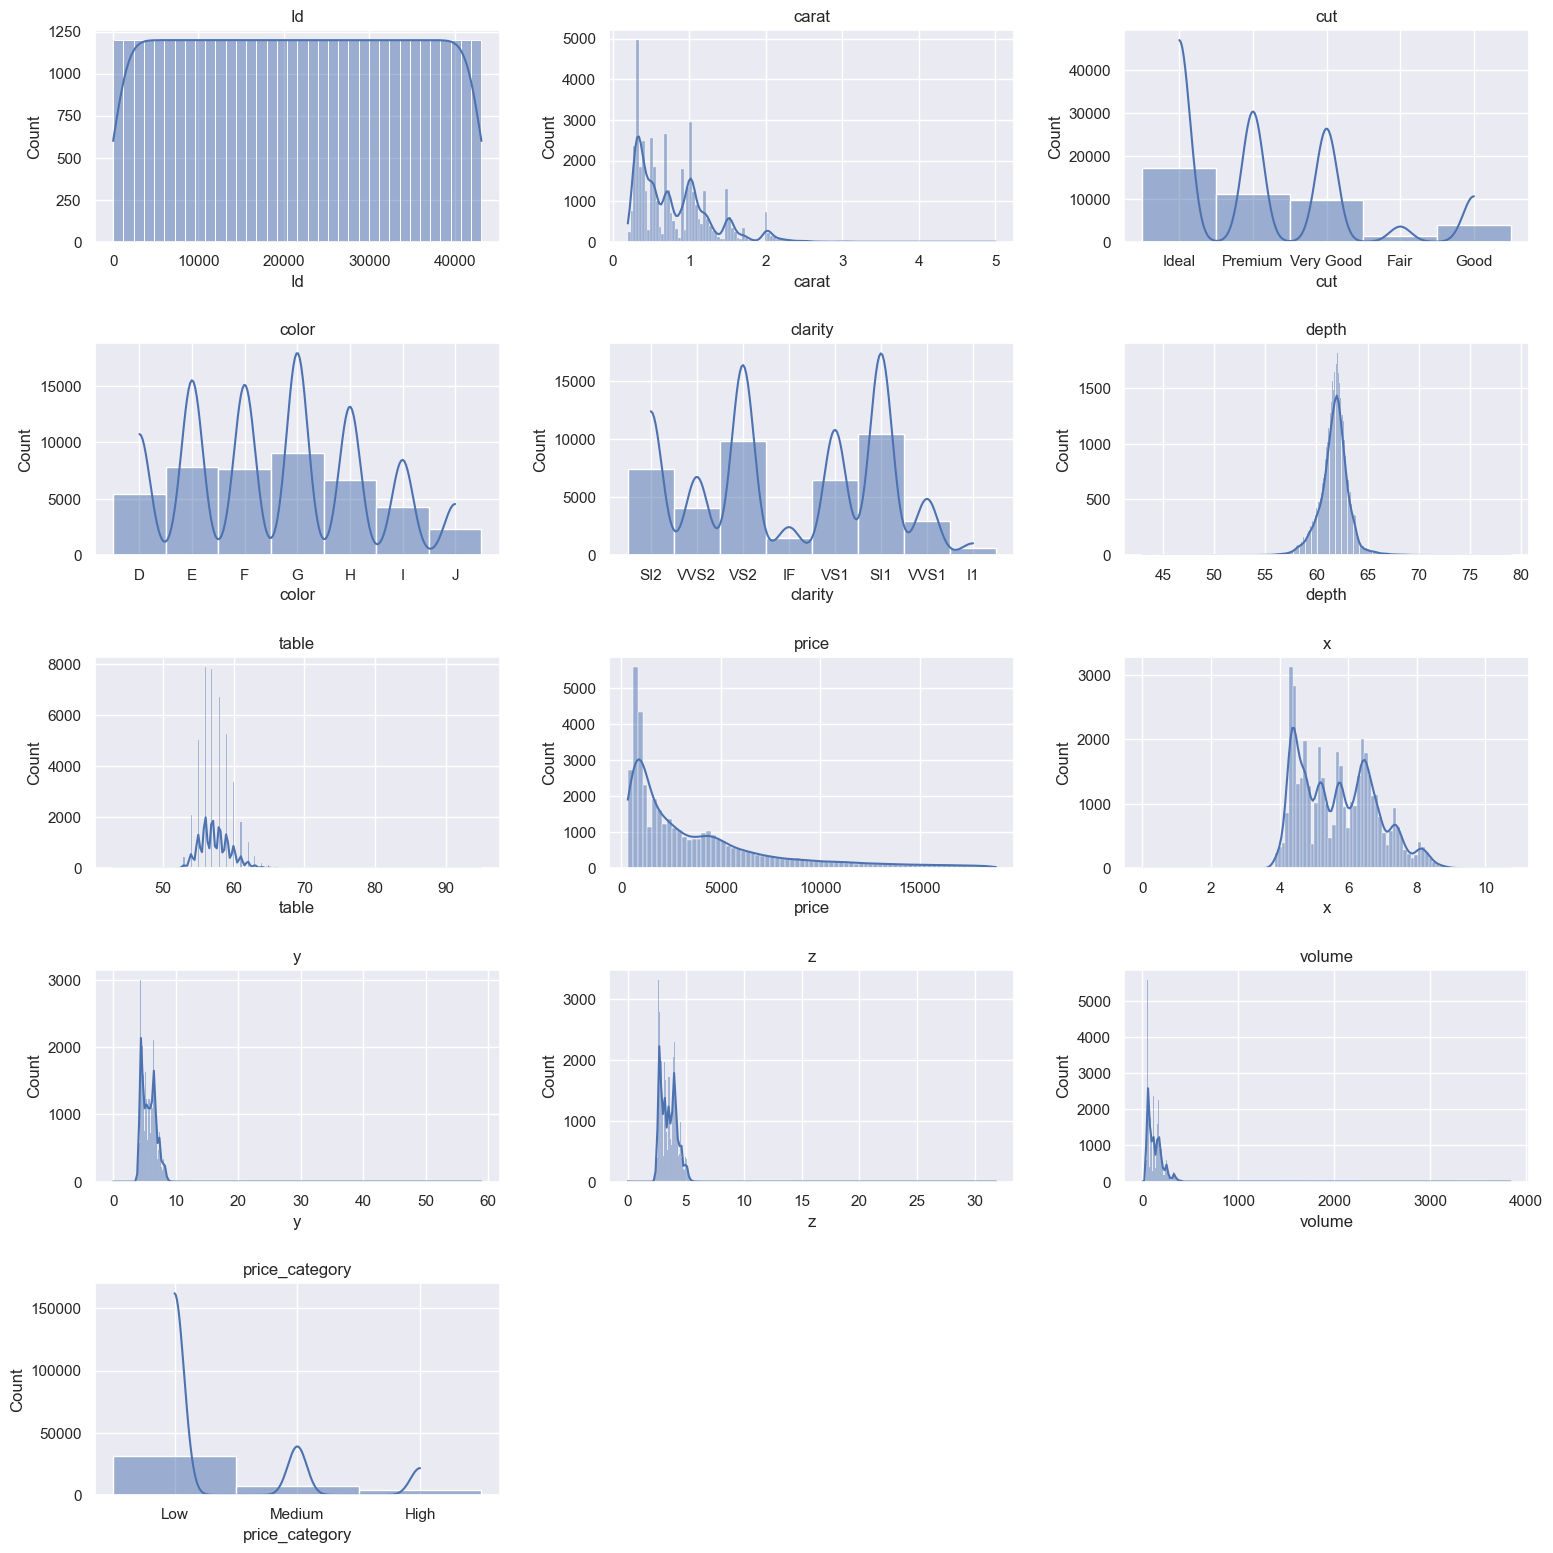

In [39]:
# Set the figure size
fig = plt.figure(figsize=(16, 16))

# Determine the number of columns and rows for subplots
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create subplots
for index, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

# Adjust layout
fig.tight_layout(pad=2)
plt.show()

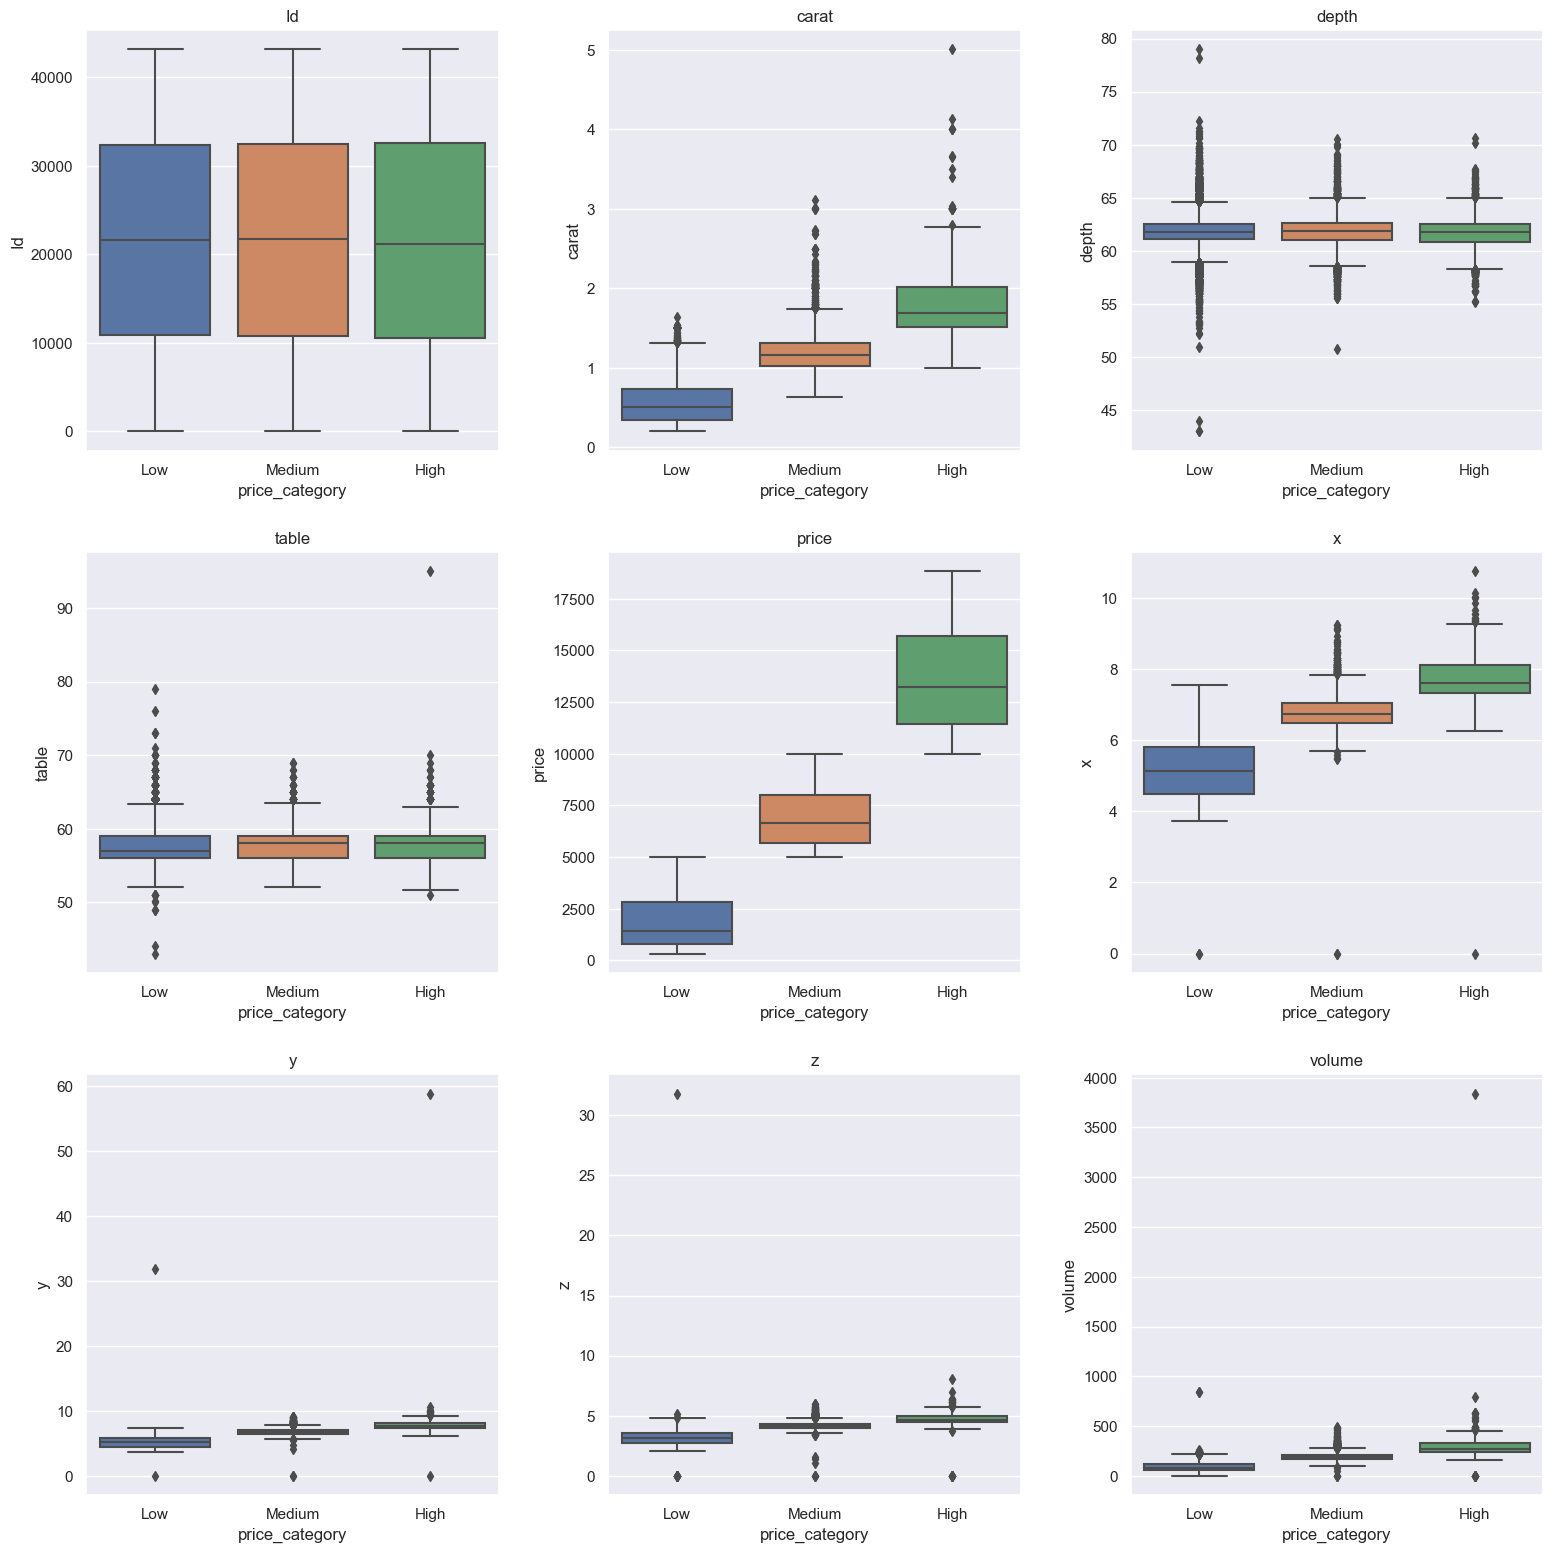

In [40]:
# Set the figure size
fig = plt.figure(figsize=(16, 16))

# Determine the number of columns and rows for subplots
num_cols = 3
num_rows = (len(df_numerical.columns) + num_cols - 1) // num_cols

# Loop through each numerical column in the DataFrame
for index, col in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(x='price_category', y=col, data=df)
    plt.title(col)

# Adjust layout
fig.tight_layout(pad=2)
plt.show()

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories for each ordinal variable
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Create an instance of OrdinalEncoder and specify the categories' order
ordinal_encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

# Fit and transform the categorical variables
ordinal_encoded = ordinal_encoder.fit_transform(df[['cut', 'color', 'clarity']])

# Add the ordinal encoded variables to the dataframe
df['cut_encoded'] = ordinal_encoded[:, 0]
df['color_encoded'] = ordinal_encoded[:, 1]
df['clarity_encoded'] = ordinal_encoded[:, 2]


In [18]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z', 'volume', 'price_category', 'cut_encoded',
       'color_encoded', 'clarity_encoded'],
      dtype='object')

In [9]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_category,cut_encoded,color_encoded,clarity_encoded
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,Low,4.0,1.0,1.0
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,High,3.0,3.0,5.0
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,Low,4.0,4.0,3.0
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,Low,4.0,3.0,3.0
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,Low,3.0,2.0,5.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df[['cut_encoded', 'color_encoded', 'clarity_encoded', 'carat', 
                 'x', 'y', 'z', 'depth', 'table']]
y = df['price']
print(X.shape,y.shape)

(43152, 9) (43152,)


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [11]:
from sklearn.preprocessing import  StandardScaler

In [12]:
# 2. Data Preprocessing: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [15]:
from sklearn.ensemble import RandomForestRegressor
# Specify hyperparameters if needed, such as the number of trees (n_estimators)
# Other hyperparameters like max_depth, min_samples_split, etc., can also be specified
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred = random_forest.predict(X_test_scaled)


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 266.6299937931377
Mean Squared Error: 286076.8830302657
Root Mean Squared Error: 534.8615550123842
R-squared: 0.9815208497760166


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best estimator from the randomized search
best_xgb_model = random_search.best_estimator_

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test_scaled)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (XGBoost after hyperparameter tuning):", rmse)


Root Mean Squared Error (XGBoost after hyperparameter tuning): 506.8677505228107


In [49]:
from sklearn.preprocessing import OrdinalEncoder
test = pd.read_csv('test.csv')
# Define the order of categories for each ordinal variable
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Create an instance of OrdinalEncoder and specify the categories' order
ordinal_encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

# Fit and transform the categorical variables
ordinal_encoded = ordinal_encoder.fit_transform(test[['cut', 'color', 'clarity']])

# Add the ordinal encoded variables to the dataframe
test['cut_encoded'] = ordinal_encoded[:, 0]
test['color_encoded'] = ordinal_encoded[:, 1]
test['clarity_encoded'] = ordinal_encoded[:, 2]


In [50]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,4.0,3.0,5.0
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,3.0,5.0,3.0
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,2.0,1.0,4.0
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,3.0,5.0,1.0
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,4.0,3.0,6.0


In [51]:
X = df[['cut_encoded', 'color_encoded', 'clarity_encoded', 'carat', 
                 'x', 'y', 'z', 'depth', 'table']]
test_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
prises = best_xgb_model.predict(test_normalized)

In [52]:
prises

array([ 4212.8735 , 14771.78   ,   767.0864 , ...,   997.949  ,
         778.52856,   718.9864 ], dtype=float32)

In [55]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['predicted_price'] = prises

# Resetting the index to use it as identifiers
df.reset_index(inplace=True)

# Saving the DataFrame to a CSV file, including the index
df.to_csv('predicted_prices.csv', columns=['index', 'predicted_price'], header=['id', 'predicted_price'], index=False)
